In [1]:
!pip install pandas scikit-learn nltk spacy
!python -m spacy download en_core_web_sm

Access is denied.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 1.5 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/12.8 MB 1.6 MB/s eta 0:00:08
     ---- ----------------------------------- 1.6/12.8 MB 1.7 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.9 MB/s eta 0:00:06
     ------- -------------------------------- 2.4/12.8 MB 1.9 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 1.8 MB/s eta 0:00:06
     --------- ------------------------------ 2.9/12.8 MB 1.8 MB/s eta 0:00:06
     --------- ------------------------------ 3.1/12.8 MB 1.7 MB/s eta 0:00:06
     ---------- ----------------------------- 3.4/12.8 MB 1.6 MB/s 

In [1]:
import pandas as pd
import nltk
import spacy
from sklearn.linear_model import LogisticRegression

print("Libraries imported successfully!")

nlp = spacy.load('en_core_web_sm')
print("spaCy model loaded successfully! You are ready to go.")

Libraries imported successfully!
spaCy model loaded successfully! You are ready to go.


# Fake News Detection 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Dataset (Using a small synthetic dataset for immediate execution)
data = {
    'text': [
        "The earth is flat and scientists are lying.",
        "A new study shows vaccines are effective and safe.",
        "Aliens landed in New York today according to secret files.",
        "The stock market reached an all-time high this morning.",
        "Drinking bleach cures all known diseases instantly.",
        "NASA launches a new rover to explore Mars.",
        "Celebrity admits to being a reptilian shape-shifter.",
        "Local council passes new infrastructure bill."
    ],
    'label': ['Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real']
}
df_news = pd.DataFrame(data)

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_news['text'])
y = df_news['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Model Training (Using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4. Evaluation
print("========== Fake News Detection ==========")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Display top important words
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Sorting the coefficients to find the most influential words
top_real = coefs.argsort()[-3:][::-1]
top_fake = coefs.argsort()[:3]

print("\nTop words indicating 'Real':", [feature_names[i] for i in top_real])
print("Top words indicating 'Fake':", [feature_names[i] for i in top_fake])

========== Fake News Detection ==========
Accuracy: 0.00

Confusion Matrix:
 [[0 0]
 [2 0]]

Top words indicating 'Real': ['council', 'local', 'passes']
Top words indicating 'Fake': ['flat', 'earth', 'lying']


# Customer Review Analyzer

========== Customer Review Analyzer ==========
[Positive] This product is amazing and works perfectly.
[Negative] Terrible experience, it broke on the first day.
[Negative] Decent quality for the price, but shipping was extremely slow.
[Positive] Absolutely love it! Highly recommend to everyone.
[Negative] Worst purchase ever, completely useless and cheap.

Top Positive Keywords: [('product', 1), ('amazing', 1), ('works', 1)]
Top Negative Keywords: [('terrible', 1), ('experience', 1), ('broke', 1)]


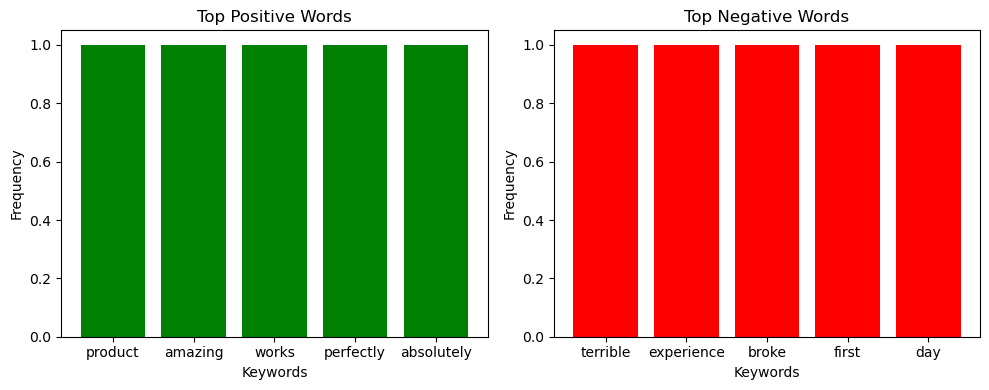

In [4]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Ensure required NLTK resources are downloaded
nltk.download('vader_lexicon', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# 1. Dataset (Synthetic Customer Reviews)
reviews = [
    "This product is amazing and works perfectly.",
    "Terrible experience, it broke on the first day.",
    "Decent quality for the price, but shipping was extremely slow.",
    "Absolutely love it! Highly recommend to everyone.",
    "Worst purchase ever, completely useless and cheap."
]

# Initialize the VADER sentiment analyzer and stop words
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

positive_words = []
negative_words = []

print("========== Customer Review Analyzer ==========")

# 2. Sentiment Classification & Keyword Extraction
for review in reviews:
    # The compound score normalizes the sentiment between -1 and 1
    score = sia.polarity_scores(review)['compound']
    sentiment = "Positive" if score > 0 else "Negative"
    print(f"[{sentiment}] {review}")
    
    # Tokenize and clean words (remove punctuation and stop words)
    words = [w.lower() for w in nltk.word_tokenize(review) if w.isalpha() and w.lower() not in stop_words]
    
    if score > 0:
        positive_words.extend(words)
    else:
        negative_words.extend(words)

# 3. Show Positive vs Negative Keyword Comparison
pos_counter = Counter(positive_words)
neg_counter = Counter(negative_words)

print("\nTop Positive Keywords:", pos_counter.most_common(3))
print("Top Negative Keywords:", neg_counter.most_common(3))

# 4. Word Frequency Visualization
def plot_frequencies(counter, title, color):
    if not counter: return
    # Extract the top 5 words and their respective counts
    words, counts = zip(*counter.most_common(5))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")

# Set up the matplotlib figure side-by-side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_frequencies(pos_counter, "Top Positive Words", 'green')

plt.subplot(1, 2, 2)
plot_frequencies(neg_counter, "Top Negative Words", 'red')

plt.tight_layout()
plt.show()

# CampusLift FAQ Chatbot

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Define 15 predefined Q&A for the CampusLift App
faq_dict = {
    "What is CampusLift?": "CampusLift is a dedicated carpooling app designed exclusively for our college students and staff.",
    "How do I sign up?": "You can sign up using your official college email ID and student ID card.",
    "Is there a fee to use CampusLift?": "The app is free, but ride costs are shared equally based on the distance.",
    "How are the ride costs calculated?": "Costs are calculated automatically within the app based on fuel prices and distance.",
    "Who can use this app?": "For security reasons, CampusLift is restricted to verified students and faculty of our college.",
    "How do I offer a ride?": "If you are driving, enter your route and available seats in the 'Offer a Ride' section.",
    "How do I request a ride?": "Enter your pickup location in the 'Find a Ride' tab to see available drivers.",
    "What if my driver cancels the ride?": "The app will instantly notify you and suggest alternative rides on the same route.",
    "Is my personal information secure?": "Yes, we use secure encryption and only share basic details with your confirmed carpool buddy.",
    "How do I pay for my share of the ride?": "Payments can be made directly through the app via UPI or integrated wallets.",
    "Can I rate my co-passengers or driver?": "Yes, after every ride, you can provide a rating to maintain a trustworthy community.",
    "What happens if I forget an item in the car?": "You can use the 'Lost and Found' feature in your ride history to message the driver.",
    "Are female-only rides available for women?": "Yes, CampusLift offers a 'Women Only' filter for female students.",
    "Who do I contact for technical support?": "You can reach out to the SPCR cell technical team via the 'Help' section.",
    "Can I schedule rides for the whole semester?": "Currently, you can schedule rides up to one week in advance."
}

questions = list(faq_dict.keys())
answers = list(faq_dict.values())

# 2. Vectorize the predefined questions
# TF-IDF natively handles stopword removal when we pass 'english'
vectorizer = TfidfVectorizer(stop_words='english')
faq_tfidf = vectorizer.fit_transform(questions)

# 3. Chatbot function using Cosine Similarity
def get_campuslift_response(user_query):
    # Vectorize the user's input
    query_vec = vectorizer.transform([user_query])
    
    # Calculate cosine similarity between the query and all FAQ questions
    similarities = cosine_similarity(query_vec, faq_tfidf).flatten()
    
    # Find the index of the highest similarity score
    best_match_idx = similarities.argmax()
    best_score = similarities[best_match_idx]
    
    # Set a threshold so it doesn't return random answers for unrelated questions
    if best_score > 0.2:
        return answers[best_match_idx]
    else:
        return "I'm sorry, I don't quite understand. Please contact the SPCR tech team for further support."

# 4. Test the Chatbot
print("========== CampusLift FAQ Chatbot ==========")
test_queries = [
    "Is there a fee to use it?",
    "Are there rides for women?",
    "Who is allowed to use the app?",
    "How do I order a pizza?" # Testing the out-of-bounds threshold
]

for query in test_queries:
    print(f"\nUser: {query}")
    print(f"Bot:  {get_campuslift_response(query)}")

========== CampusLift FAQ Chatbot ==========

User: Is there a fee to use it?
Bot:  The app is free, but ride costs are shared equally based on the distance.

User: Are there rides for women?
Bot:  Yes, CampusLift offers a 'Women Only' filter for female students.

User: Who is allowed to use the app?
Bot:  For security reasons, CampusLift is restricted to verified students and faculty of our college.

User: How do I order a pizza?
Bot:  I'm sorry, I don't quite understand. Please contact the SPCR tech team for further support.


# Automatic Text Summarizer

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import heapq

# Ensure required NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# 1. Dataset (Synthetic Article for immediate execution)
text = """Artificial intelligence is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by animals including humans. AI research has been defined as the field of study of intelligent agents, which refers to any system that perceives its environment and takes actions that maximize its chance of achieving its goals. The term "artificial intelligence" had previously been used to describe machines that mimic and display human cognitive skills that are associated with the human mind, such as learning and problem-solving. This definition has since been rejected by major AI researchers who now describe AI in terms of rationality and acting rationally, which does not limit how intelligence can be articulated."""

# 2. Tokenize sentences and define stop words
sentences = sent_tokenize(text)
stop_words = set(stopwords.words('english'))

# 3. Calculate word frequencies
word_frequencies = {}
for word in word_tokenize(text.lower()):
    # Filter out punctuation and stop words
    if word.isalnum() and word not in stop_words:
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

# Normalize frequencies by dividing by the maximum frequency
maximum_frequency = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word] / maximum_frequency)

# 4. Calculate sentence scores based on word frequencies
sentence_scores = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word_frequencies.keys():
            if sentence not in sentence_scores:
                sentence_scores[sentence] = word_frequencies[word]
            else:
                sentence_scores[sentence] += word_frequencies[word]

# 5. Pick the best sentences (Top 2)
# heapq seamlessly ranks the dictionary values and returns the highest scoring keys
summary_sentences = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)
summary = " ".join(summary_sentences)

print("========== Automatic Text Summarizer ==========")
print(f"Original Length: {len(text)} characters")
print(f"Summary Length: {len(summary)} characters\n")
print("Summary:\n", summary)

========== Automatic Text Summarizer ==========
Original Length: 737 characters
Summary Length: 349 characters

Summary:
 Artificial intelligence is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by animals including humans. The term "artificial intelligence" had previously been used to describe machines that mimic and display human cognitive skills that are associated with the human mind, such as learning and problem-solving.


# Named Entity Recognition

In [7]:
import spacy
from spacy import displacy
from collections import Counter

# 1. Load the pre-trained English model (we downloaded this earlier)
nlp = spacy.load("en_core_web_sm")

# 2. Dataset (Sample text for immediate execution)
text = """Tim Cook, the CEO of Apple Inc., announced on October 15th, 2025, 
that the company would be opening a new AI research facility in London, U.K. 
The project is expected to cost over $1 billion and will employ 500 engineers."""

# Process the text through the NLP pipeline
doc = nlp(text)

# 3. Extract specific entities (PERSON, ORG, GPE, DATE)
target_labels = ['PERSON', 'ORG', 'GPE', 'DATE']
extracted_labels = [ent.label_ for ent in doc.ents if ent.label_ in target_labels]

print("========== Named Entity Recognition ==========")

# 4. Show entity frequency count
entity_counts = Counter(extracted_labels)
for ent_type, count in entity_counts.items():
    print(f"Entity Type: {ent_type} | Count: {count}")

print("\n--- Extracted Entity Details ---")
for ent in doc.ents:
    if ent.label_ in target_labels:
        # Print the text and its corresponding label, formatted into columns
        print(f"{ent.text:<20} -> {ent.label_}")

# 5. Display colored entity output directly in Jupyter
print("\n--- Visualizing Entities ---")
displacy.render(doc, style="ent", jupyter=True)

========== Named Entity Recognition ==========
Entity Type: PERSON | Count: 1
Entity Type: ORG | Count: 1
Entity Type: DATE | Count: 1
Entity Type: GPE | Count: 3

--- Extracted Entity Details ---
Tim Cook             -> PERSON
Apple Inc.           -> ORG
October 15th, 2025   -> DATE
AI                   -> GPE
London               -> GPE
U.K.                 -> GPE

--- Visualizing Entities ---
